With dimension = 1 my_function will be used and a plot will be showed
 With dimension > 1 the sphere function will be used
Please enter the dimension of the problem
1
Please enter the number of hidden nodes
4
Please enter number of iterations: 3
Please choose the activation function 0 for logistic, 1 for tanh: 1

The smallest error is, 18837.5356823 obtained with the following MLP:

{'input_nodes': array([ 1.,  1.]), 'ih_weights': array([[ 5.29215704,  1.20047163],
       [ 2.93621395,  6.7226796 ],
       [ 5.60267397, -2.93183364],
       [ 2.85026525, -0.45407162]]), 'output_nodes': array([ 5.64120992]), 'hidden_nodes': [0.9999954122114132, 0.9999999918450434, 0.9904699934420748, 0.9835511303250034], 'ho_weights': array([[-0.30965656],
       [ 1.23179551],
       [ 0.43213071],
       [ 4.36282052]])}
ERR = 18837.5356823


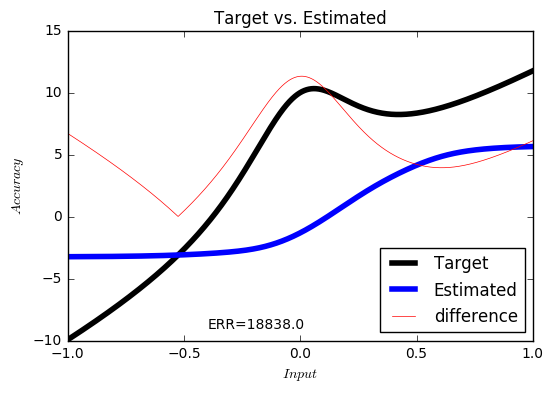

----- 5 seconds -----

Genetic Algorithm

Please enter the size of the population
1000
progress:

0 %
100 %
200 %
300 %
400 %
500 %
600 %
700 %
800 %
900 %
100 %

Fittest configuration:
{'activation': 'tanh', 'Number_hidden': 7, 'MLP': {'input_nodes': array([ 1.,  1.]), 'ih_weights': array([[ 4.97475645,  1.1348365 ],
       [ 2.78049155, -1.79538145],
       [-1.25495267, -2.3127459 ],
       [-5.03195955, -4.00701235],
       [ 3.93299929, -3.64756444],
       [ 0.34879501, -1.92544471],
       [-3.07619434, -0.77473328]]), 'output_nodes': array([ 6.24383822]), 'hidden_nodes': [0.999990130325211, 0.7552695271006189, -0.9984084486770737, -0.999999971824038, 0.27792766669582375, -0.9180770619469398, -0.9990964326766467], 'ho_weights': array([[ 7.25233644],
       [-3.87781023],
       [ 2.20133865],
       [-3.01194055],
       [-0.33981829],
       [-0.63937922],
       [-0.61426043]])}, 'ERR': 3220.898483725499} 

Please enter the number of generations
10
generation n: 0
generation n

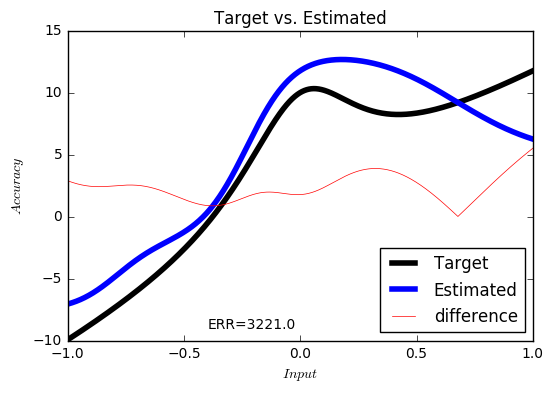

In [5]:
import numpy as np
import math, random, pylab, timeit
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------------------------------------------------------#

#define activation functions
def logistic(x):
    return 1 / (1 + np.exp(-x))  
def tanh(x):
    return math.tanh(x)

#target functions to create the dataset
#my function - 1D 
def my_function(inputs_array):
    x=inputs_array
    return ((1/((x**2)+0.1)+(math.sin(x)) +10*x))
#sphere function
def sphere(inputs_array): #working with two inputs the array has to have lenght=2
    outputs=np.zeros(len(inputs_array))
    numb_inputs=len(inputs_array[0])
    for row in range (len(inputs_array)):
        sum=0.0
        for i in range(numb_inputs):
            sum += inputs_array[row][i]**2
        outputs[row]=sum
    return outputs

#the following two functions create dataset given the dimension of the problem as input (that is the number of input nodes)
#returns a list with XY[0] being the array of X vectors each one of dimension 'Dim' and XY[1] being the array of the outputs
#The lenght of the dataset is preset to 1000 to have a large enough dataset 
def create_dataset(Dim):
    np.random.seed(9)
    X = np.random.uniform(low=-1.0,high=1.0, size=(1000,Dim))
    Y = sphere(X)
    return [X, Y]
def create_dataset_1D(): #for the 1-dimensional case
    N_points=1000
    X1D = np.linspace(-1,1,N_points) # X1D is composed by N_points linearly spaced numbers
    Y1D = np.zeros(N_points)
    # computing the values of f(x)
    for i in range(len(X1D)):
        Y1D[i]= my_function(X1D[i]) #y is the array with target values
    return [X1D, Y1D]

#function to initialise the MLP NN ----- WITH SEED -----
def first_initialise(input_arr, N_hidden, N_output=1):
        #arguments:
                   #array with input values
                   #number of hidden neurons
                   #number of output neurons (default 1)
        
        N_input=len(input_arr) #=dimension of the problem = number of input nodes
        # initialise arrays of nodes to ones
        input_nodes = np.ones(N_input+1) # + 1 for the bias
        hidden_nodes = [1.0] * N_hidden #start with all hidden nodes active
        output_nodes = [1.0] * N_output
        # create random weights
        # randn generates an array of shape (d0, d1, ..., dn), filled with random floats from a normal distrib. (mean=0,var=1)
        np.random.seed(0)
        sigma = 3
        ih_weights = sigma*np.random.randn(N_hidden, N_input +1) #weights from input nodes to hidden nodes
        ho_weights = sigma*np.random.randn(N_hidden, N_output) #weights from hidden nodes to output nodes
        #return a dictionary with the initial set up of MLPNN
        MLP = {'input_nodes':input_nodes, 'hidden_nodes':hidden_nodes, 'output_nodes':output_nodes, 'ih_weights':ih_weights, 'ho_weights':ho_weights}
        return MLP

#function to initialise the MLP NN  ----- WITHOUT SEED -----
def initialise(input_arr, N_hidden, N_output=1, sigma_max=10):
        #arguments:
                    #array with input values
                    #number of hidden neurons
                    #number of output neurons (default 1)
                    #standard deviation sigma_max default 10
                    
        N_input=len(input_arr+1) #=dimension of the problem
        # initialise arrays of nodes to ones
        input_nodes = np.ones(N_input+1) #for now no bias
        hidden_nodes = [1.0] * N_hidden #start with all hidden nodes active
        output_nodes = [1.0] * N_output
        
        # create random weights
        # randn generates an array of shape (d0, d1, ..., dn), filled with random floats from a normal distrib. (mean=0,var=1)
        sigma = np.random.uniform(1,sigma_max)
        ih_weights = sigma*np.random.randn(N_hidden, N_input+1) #weights from input nodes to hidden nodes
        ho_weights = sigma*np.random.randn(N_hidden, N_output) #weights from hidden nodes to output nodes
        #return a dictionary with the set up of MLPNN
        MLP = {'input_nodes':input_nodes, 'hidden_nodes':hidden_nodes, 'output_nodes':output_nodes, 'ih_weights':ih_weights, 'ho_weights':ho_weights}
        return MLP

#feedforward function
#for inputs and output there are no activation functions
#for hidden nodes there is the activation functions (logistic or tanh)
def FF(MLP, activation):
    # cycle on hidden nodes
    for h in range(len(MLP['hidden_nodes'])):
        sum = 0.0
        for i in range(len(np.atleast_1d(MLP['input_nodes']))):#atleast_1d() to avoid the conversion to scalar when working in 1D
            sum += MLP['input_nodes'][i] * MLP['ih_weights'][h][i] #i=node_from h=node_to
        
        #apply the activation function (logistic or tanh)
        MLP['hidden_nodes'][h] = activation(sum)
        #MLP['hidden_nodes'][h] = tanh(sum)
    # output node (just one output node -> simple for-cycle)
    sum = 0.0
    for h in range(len(MLP['hidden_nodes'])): 
        sum += MLP['hidden_nodes'][h] * MLP['ho_weights'][h] #h=node_from o=node_to
    MLP['output_nodes'] = sum #this is y_hat, the 'estimate' of the target value 
    return MLP #return the dictionary with the whole fed MLP


#function to plot together the estimated and the target functions
def plot_together(X, Y, best_set, activation):
    #recompute the array of estimated y = y_hat 
    #first we have to initialize the network
    activation_function=activation
    y_hat=np.zeros(len(X))
    ERR=0
    err=0
    #reinitialise the nodes to 1
    best_set['input_nodes'] = [1.0] * len(best_set['input_nodes'])
    best_set['hidden_nodes'] = [1.0] * len(best_set['hidden_nodes'])
    best_set['output_nodes'] = [1.0] * len(best_set['output_nodes'])
    
    for i in range (len(X)):
        arr = np.ones(len(np.atleast_1d(X[i]))+1) #+1 for the bias
        #fill arr with the values of the i-th input vector
        for k in range (len(np.atleast_1d(X[i]))):
            arr[k] = X[i]
        best_set['input_nodes'] = np.atleast_1d(arr) #to avoid array converted to scalar
        #save the value of y_hat
        y_hat[i] = FF(best_set, activation_function)['output_nodes']
        #compute the error for each couple y - y_hat
        err = y_hat[i] - Y[i] #target minus estimated
        #summing the errors to compute the total error
        ERR += err**2 #measure of fitness
    ERR=ERR/2 #total error formula: ERR=1/2*sum[(err)^2]
    print 'ERR =', ERR

    #plot the two functions together to compare them
    fig=plt.figure()
    plt.plot(X, Y, 'black', label='Target', linewidth=4.0)
    plt.plot(X, y_hat, 'blue',  label='Estimated', linewidth=4.0)
    plt.plot(X, abs(y_hat-Y), 'red', label='difference', linewidth=0.5)
    plt.annotate('ERR='+str(round(ERR)), xy=(-0.4, -9), xytext=(-0.4, -9))
    plt.xlabel('$Input $')
    plt.ylabel('$Accuracy $')
    plt.title('Target vs. Estimated')
    plt.legend(loc='lower right')
    plt.savefig('plot_together.png') #save figure
    plt.show()
    


#--------------------------------------------------------- TRAINING ------------------------------------------------------------#



#This simple GA creates randomly many (N-iterations) different configurations of MLP
def SearchBestSet_1D(N_iterations, MLP, inputs, target_outputs, activation=logistic):
    #stopping criterion = number of iterations
    dic_set_ERR = {} #dictionary with key = iter (iteration) and value = dictionary with ERR, MLP and n. hidden nodes 
                     #to retrieve the best MLP that produces the minimum total error (so the fittest one)
    for iter in range (N_iterations):
        ERR=0
        #initialise the input nodes of MLP with the values in the training set
        for i in range (len(inputs)): #inputs is the big array of arrays with all the input values X from the dataset
                                      #each input[i] is composed of number of values equal to the dimension of the problem
            arr = np.ones(len(np.atleast_1d(inputs[i]))+1) #+1 for the bias
            #fill arr with the values of the i-th input vector
            for k in range (len(np.atleast_1d(inputs[i]))):
                          arr[k] = inputs[i]
                    
            MLP['input_nodes'] = np.atleast_1d(arr) #to avoid array converted to scalar when working in 1D
            #feedforward to compute the output = y_hat
            MLP = FF(MLP, activation)
            #compute the error for each couple y - y_hat
            err = MLP['output_nodes'] - target_outputs[i] #error = target minus estimated
            #sum the squared errors to compute the total error
            ERR += err**2 #measure of fitness
        ERR=ERR/2 #total error formula: ERR=1/2*sum[(err)^2]
        #fill the dictionary
        tmp_dic={}
        tmp_dic['ERR'] = np.asscalar(ERR)
        tmp_dic['MLP'] = MLP
        tmp_dic['Number_hidden'] =  len(MLP['hidden_nodes']) #to retrieve the number of hidden nodes
        #dictionary with key = iter (iteration) and value = dictionary with ERR, MLP and n. hidden nodes
        dic_set_ERR[iter] = tmp_dic
        #Initilise again the MLP: different set of weights - this time NO SEED and sigma = 10, equal number of hidden nodes
        MLP=initialise(input_arr=input_arr, N_hidden=len(MLP['hidden_nodes']), N_output=1, sigma_max=10)
    return dic_set_ERR


#This simple GA creates randomly many (N-iterations) different configurations of MLP
def SearchBestSet(N_iterations, MLP, inputs, target_outputs, activation=logistic):
    #stopping criterion = number of iterations
    dic_set_ERR = {} #dictionary with key = iter (iteration) and value = dictionary with ERR, MLP and n. hidden nodes 
                     #to retrieve the best MLP that produces the minimum total error (so the fittest one)
    for iter in range (N_iterations):
        ERR=0
        #initialise the input nodes of MLP with the values in the training set
        for i in range (len(inputs)): #inputs is the big array of arrays with all the input values X from the dataset
                                      #each input[i] is composed of number of values equal to the dimension of the problem
            arr = np.ones(len(np.atleast_1d(inputs[i]))+1) #+1 for the bias
            #fill arr with the values of the i-th input vector
            for k in range (len(np.atleast_1d(inputs[i]))):
                          arr[k] = inputs[i][k]
            MLP['input_nodes'] = np.atleast_1d(arr) #to avoid array converted to scalar when working in 1D
            #feedforward to compute the output = y_hat
            MLP = FF(MLP, activation)
            #compute the error for each couple y - y_hat
            err = MLP['output_nodes'] - target_outputs[i] #error = target minus estimated
            #sum the squared errors to compute the total error
            ERR += err**2 #measure of fitness
        ERR=ERR/2 #total error formula: ERR=1/2*sum[(err)^2]
        #fill the dictionary
        tmp_dic={}
        tmp_dic['ERR'] = np.asscalar(ERR)
        tmp_dic['MLP'] = MLP
        tmp_dic['Number_hidden'] =  len(MLP['hidden_nodes']) #to retrieve the number of hidden nodes
        #dictionary with key = iter (iteration) and value = dictionary with ERR, MLP and n. hidden nodes
        dic_set_ERR[iter] = tmp_dic
        #Initilise again the MLP: different set of weights - this time NO SEED and sigma = 10, equal number of hidden nodes
        MLP=initialise(input_arr=input_arr, N_hidden=len(MLP['hidden_nodes']), N_output=1, sigma_max=10)
    return dic_set_ERR


#--------------------------------------------------------- main ---------------------------------------------------------------#    

start = timeit.default_timer()
#input from keyboard the dimension of the problem that can be 2 or 4
Dim=0
print "With dimension = 1 my_function will be used and a plot will be showed\n With dimension > 1 the sphere function will be used"
Dim = int(raw_input("Please enter the dimension of the problem\n"))
#create dataset
if (Dim == 1):
    XY = create_dataset_1D()
if (Dim > 1):
    XY = create_dataset(Dim)
X=XY[0]
Y=XY[1]

#create array of input nodes
input_arr=np.ones(Dim)
#Ask the desired number of hidden nodes
N_hidden = int(raw_input("Please enter the number of hidden nodes\n"))
#initialize the MLP with first_initialize() that makes use of the seed in order to do meaningful comparisons
MLP=first_initialise(input_arr=input_arr, N_hidden = N_hidden, N_output=1)
#choose number of iterations
N_iterations = int(raw_input("Please enter number of iterations: "))
#choose the activation function to use to feedforward the MLP ANN
choice=10
while (choice != 0 and choice != 1):
    choice =  int(raw_input("Please choose the activation function 0 for logistic, 1 for tanh: "))
if choice == 0: activation = logistic
if choice == 1: activation = tanh
    
if (Dim == 1):
    dic_set_ERR = SearchBestSet_1D(N_iterations, MLP, X, Y, activation)
else: dic_set_ERR = SearchBestSet(N_iterations, MLP, X, Y, activation)

#find the minimum error in the dictionary to retrieve the corresponding MLP with set of weights
min_ERR_MLP = min(dic_set_ERR.values(), key=lambda X:X['ERR'])

print "\nThe smallest error is,", min_ERR_MLP['ERR'], "obtained with the following MLP:\n"
#print min_ERR_MLP
best_set = min_ERR_MLP['MLP']
print  best_set

if (Dim == 1):
    plot_together(X, Y, best_set, activation)

#print running time
stop = timeit.default_timer()
print("----- %d seconds -----" %(stop - start))


#-----------------------------------------------------------------------------------------------------------------------------#
#------------------------------------------------GENETIC ALGORITHM------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------# 
start = timeit.default_timer() 
print "\nGenetic Algorithm\n" 
def create_initial_population(Dim, MLP, inputs, target_outputs, pop_size=100, sigma_max=10):
    #stopping criterion = number of iterations
    dic_set_ERR = {} #dictionary with key = ERR and value = MLP with set of weights 
                     #to retrieve the best MLP that produces the minimum total error
    print "progress:\n"
    for ind in range (pop_size):
        #create array of ones for input nodes
        input_arr=np.ones(len(np.atleast_1d(inputs[0])))
        #the number of hidden nodes is drawn from a unifrom distribution U[3,100]
        N_hidden = np.random.randint(low=3, high=10)
        #create new MLP with the random number of hidden nodes
        MLP = initialise(input_arr, N_hidden, N_output=1, sigma_max=sigma_max)
        ERR=0
        tmp_dic={}
        #choose randomly the activation function between logistic and tanh
        if random.uniform(0, 1) < 0.5:
            activation=logistic
            tmp_dic['activation'] = 'logistic'
        else:
            activation = tanh
            tmp_dic['activation'] = 'tanh'

        #initialise the input nodes of MLP with the values in the training set
        for i in range (len(inputs)): #quando sarà con due valori in inputs sarà un array di array 
                                      #quindi inputs[i] sarà ogni array elementare composto da due valori
            arr = np.ones(len(np.atleast_1d(inputs[i]))+1) #+1 for the bias
            if Dim == 1:
                for k in range (len(np.atleast_1d(inputs[i]))):
                              arr[k] = inputs[i]
            else:
                for k in range (len(np.atleast_1d(inputs[i]))):
                              arr[k] = inputs[i][k]
            MLP['input_nodes'] = np.atleast_1d(arr) #to avoid array converted to scalar
            #feedforward to compute the output = y_hat
            MLP = FF(MLP, activation)
            #compute the error for each couple y - y_hat
            err = MLP['output_nodes'] - target_outputs[i] #target minus estimated
            #sum the squared errors to compute the total error
            ERR += err**2 #measure of fitness
        ERR=ERR/2 #total error formula: ERR=1/2*sum[(err)^2]

        #fill the dictionary
        tmp_dic['ERR'] = np.asscalar(ERR)
        tmp_dic['MLP'] = MLP
        tmp_dic['Number_hidden'] =  len(MLP['hidden_nodes']) #to retrieve the number of hidden nodes
        if (ind % (pop_size/10)) == 0:
            print ind, "%"
        dic_set_ERR[ind] = tmp_dic

        #Initilise again the MLP with a different set of weights - this time NO SEED
        MLP=initialise(input_arr=input_arr, N_hidden=len(MLP['hidden_nodes']), N_output=1, sigma_max=sigma_max)
    print "100 %\n"
    return dic_set_ERR

#create initial population 
population_size = int(raw_input("Please enter the size of the population\n")) 
dic_init_pop = create_initial_population(Dim, MLP, X, Y, pop_size=population_size)
#find the minimum error in the dictionary 
min_ERR_MLP = min(dic_init_pop.values(), key=lambda x:x['ERR']) 
print "Fittest configuration:\n", min_ERR_MLP, "\n" 
best_set = min_ERR_MLP['MLP']
#print running time stop = timeit.default_timer() print("----- %d seconds -----" %(stop - start))
#--------------------------------------------EVOLUTION OF THE POPULATION-------------------------------------------------------#
#------------------------------------------------------------------------------------------------------------------------------#

#Now starting from the initial population evolve the initia population, dic_init_pop. 
start = timeit.default_timer()
#sort the dictionary in order of ERR (the fitness measure) 
sorted_dic_pop = sorted(dic_init_pop.values(), key=lambda x:x['ERR'])
#The 25% best configurations are stored and with these individuals -> crossover 
list_old_pop=sorted_dic_pop 
list_new_pop=list_old_pop 
N_generations = int(raw_input("Please enter the number of generations\n"))

for gen in range(N_generations): 
    print "generation n:", gen 
    lenght = len(list_old_pop) 
    for individual in range(lenght):
        #The first quarter of the new population is the 25% fittest of the old one not to lose the best individuals
        #for the second best quarter mutation: new set of weights with same numbr of hidden nodes
        if individual > lenght/4 and individual < lenght/2:
            #mutation: for the second best 25% of the population new set of weights but same number of hidden nodes
            input_arr=np.ones(len(list_old_pop[individual]['MLP']['input_nodes'])-1) #minus 1 for the bias
            N_hidden = len(list_old_pop[individual]['MLP']['hidden_nodes'])
            list_old_pop[individual]['MLP'] = initialise(input_arr, N_hidden, N_output=1, sigma_max=10)
            list_new_pop [individual] = list_old_pop[individual]
        #a quarter of the new population is created by means of a crossover between 2 parents taken among the best quarter
        #according to this algorithm the parents will be: first and second, second and third, third and fourth and so on.
        if individual > lenght/2 and individual < 3*lenght/4:
            #assign activation function from the i-th parent
            list_new_pop[individual]['activation']=list_old_pop[individual-(lenght/2)-1]['activation'] 
            #assign set of weights of i-th + 1 parent
            list_new_pop[individual]['MLP']=list_old_pop[individual-(lenght/2)]['MLP']

        #the last quarter of the new population is completely fresh with a number of hidden nodes from U[3,20] instead of U[3,10]
        #and sigma max = 30 allowing the presence of configurations with more hidden nodes and greater weights (in absol. value)
        if individual >= 3*lenght/4:
            N_hidden = np.random.randint(low=3, high=20)
            inputarr=np.ones(len(list_old_pop[individual]['MLP']['input_nodes'])-1) #minus 1 for the bias
            list_new_pop[individual]['MLP'] = initialise(inputarr, N_hidden, N_output=1, sigma_max=30)

    #once the population has been updated we have to evaluate the fitness of each configuration using the training dataset
    target_Y=Y
    X=X
    for individual in range(len(list_new_pop)):
        MLP=list_new_pop[individual]['MLP']
        activation = list_new_pop[individual]['activation']
        ERR=0
        #initialise the input nodes of MLP with the values from the training set
        for i in range (len(X)):
            arr = np.ones(len(np.atleast_1d(X[i]))+1) #+1 for the bias

            if Dim == 1:
                for k in range (len(np.atleast_1d(X[i]))):
                              arr[k] = X[i]
            else:
                for k in range (len(np.atleast_1d(X[i]))):
                              arr[k] = X[i][k]
            MLP['input_nodes'] = np.atleast_1d(arr) #to avoid array converted to scalar
            #feedforward to compute the output = y_hat
            if activation == 'tanh':
                MLP = FF(MLP, tanh)
            elif activation == 'logistic':
                MLP = FF(MLP, logistic)
            #compute the error for each couple y - y_hat
            err = MLP['output_nodes'] - target_Y[i] #target minus estimated
            #sum the squared errors to compute the total error
            ERR += err**2 #measure of fitness
        ERR=ERR/2 #total error formula: ERR=1/2*sum[(err)^2]
        list_new_pop[individual]['ERR']=ERR
    #the new population list of dictionaries sorted by the error ERR will be the old population at the next generation 
    list_old_pop=sorted(list_new_pop, key=lambda k: k['ERR'])
    #exit condition based on the performance, that is the ERR 
    #list_old_pop[0] is the configuration with the minimum error ERR
    if list_old_pop[0]['ERR']<20:
        print "good fitness - stop"
        break
print "generation stop", "\nError = ", list_old_pop[0]['ERR'] #print the fittest - minimum error reached in th N_generations
stop = timeit.default_timer() 
print("----- %d seconds -----" %(stop - start))
if (Dim == 1): 
    if list_old_pop[0]['activation'] == 'tanh': 
        activation = tanh 
    if list_old_pop[0]['activation'] == 'logistic': 
        activation = logistic
    best = list_old_pop[0]['MLP'] 
    plot_together(X, Y, best, activation)
    
    